This notebook tries to identify if there are issues when differentiating dynamic systems with respect to dynamic parameters.  It tries to find if there are ways to characterize when this identification is difficult, not unique, etc.

In [89]:
# Make some integrators
import casadi as ca
from copy import deepcopy

def explicit_euler(xi_d, xi, params, h):
    return xi + h*xi_d(xi, *params)

def symplectic_euler(xi_d, xi, h):
    xi_plus = deepcopy(xi)
    xd_plus = xi[1]+h*xi_d[1]
    x_plus = xi[0]+h*xd_plus[1]
    return ca.vertstack(x_plus, xd_plus)

In [90]:
# Have some dynamics, generate some data.
M = ca.SX.sym('M')
B = ca.SX.sym('B')
K = ca.SX.sym('K')
xi = ca.SX.sym('xi',2)
x_c = ca.SX.sym('x_c')

bias = 1

params = [M, B, K, x_c]

contact_force = ca.if_else(xi[0]>x_c, -K*(xi[0]-x_c), 0)
x_dd = 1/M*(-B*xi[1] - contact_force + bias)
xi_d = ca.Function('xdot', [xi, *params], [ca.vertcat(xi[1], x_dd)])

integrator = explicit_euler
h = 0.01
traj = [[0, -0.3]]

#print(xi_d(traj[-1], *paramsp))
#print(integrator(xi_d, traj[-1], paramsp, h))

for _ in range(30):
    traj.append(integrator(xi_d, traj[-1], params, h))


traj_fn = ca.Function('traj', [*params], [*traj])
traj = ca.horzcat(*traj).T

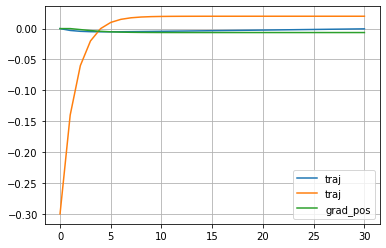

In [92]:
# Eval and plot
import matplotlib.pyplot as plt
Mp = 1; Bp = 50; Kp = 100
x_cp = 0.1
paramsp = [Mp, Bp, Kp, x_cp]

trajp = traj_fn(*paramsp)
traj_pts = ca.horzcat(*trajp).T.full()
plt.plot(traj_pts, label="traj")

p = M
dx_c_fn = ca.Function('dx', [*params], [ca.jacobian(traj[:,0], p)])
dx_c = dx_c_fn(*paramsp)
plt.plot(dx_c, label='grad_pos')
plt.legend()
plt.grid(True)


In [86]:
print(ca.if_else(False, 0, 1))

1
